# 2.1a: Simple Linear Regression

## Stuff before exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
fuelDF = pd.read_csv("1a_FuelConsumptionCo2.csv")
fuelDF.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
fuelDF.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = fuelDF[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


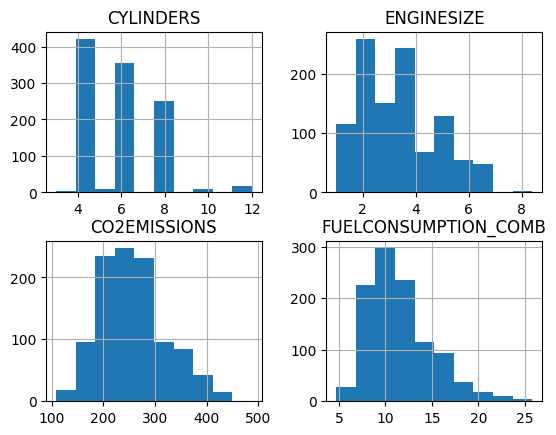

In [5]:
cdf.hist(["CYLINDERS", "ENGINESIZE", "CO2EMISSIONS", "FUELCONSUMPTION_COMB"])
plt.show()

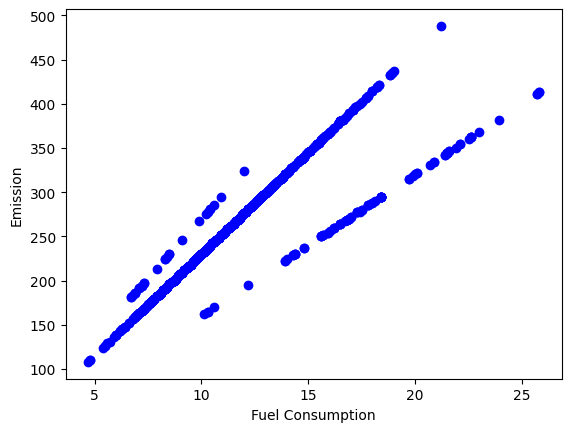

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

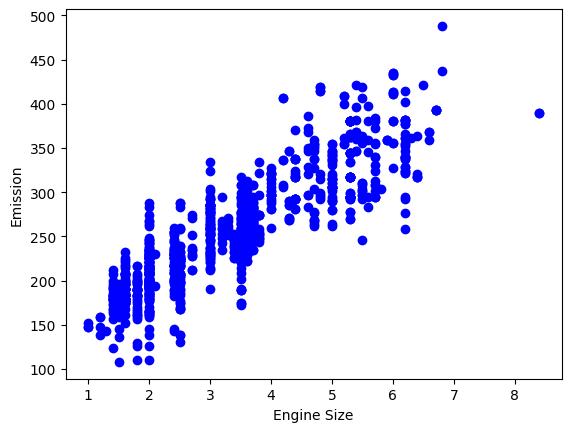

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

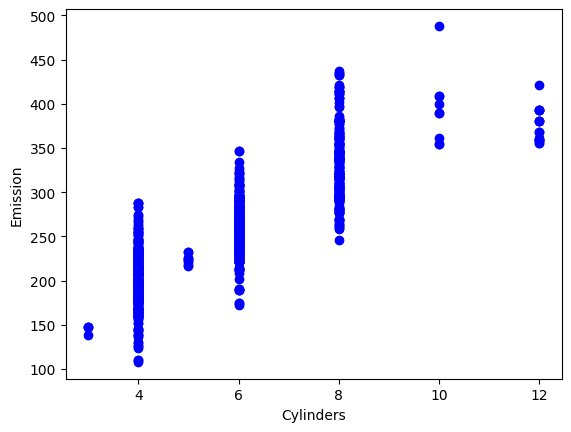

In [8]:
# PRACTICE: Plot CYLINDER vs the Emission, to see how linear is their relationship is

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [9]:
from sklearn import linear_model

In [10]:
mask = np.random.rand(len(fuelDF)) < 0.8

In [11]:
train = cdf[mask]
test = cdf[~mask]

In [27]:
engineTrainX = np.asanyarray(train[["ENGINESIZE"]])
trainY = np.asanyarray(train[["CO2EMISSIONS"]])

engineRegr = linear_model.LinearRegression()
engineRegr.fit(engineTrainX, trainY)

print(f"Coefficients: {engineRegr.coef_}")
print(f"Intercept: {engineRegr.intercept_}")

Coefficients: [[39.77119999]]
Intercept: [122.9443983]


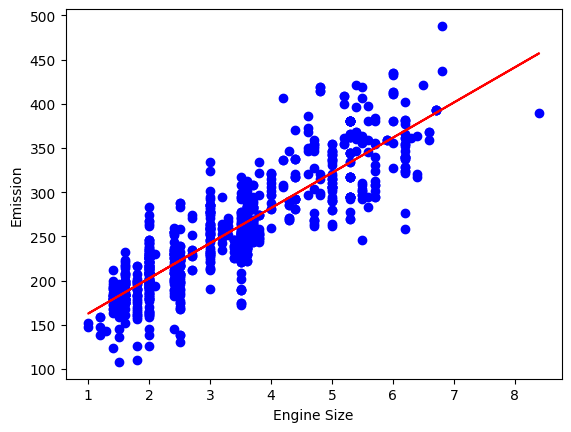

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(engineTrainX, engineRegr.coef_[0][0] * engineTrainX + engineRegr.intercept_[0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [14]:
from sklearn.metrics import r2_score

In [30]:
engineTestX = np.asanyarray(test[["ENGINESIZE"]])
testY = np.asanyarray(test[["CO2EMISSIONS"]])

engineTestPredictions = engineRegr.predict(engineTestX)

print(f"Mean absolute error: {np.mean(np.absolute(engineTestPredictions - testY))}")
print(f"Residual sum of squares: {np.mean(engineTestPredictions - testY)}")
print(f"R^2 score: {r2_score(testY, engineTestPredictions)}")

Mean absolute error: 22.957205069899718
Residual sum of squares: -1.1118813118842823
R^2 score: 0.7388728868978544


## Exercises

In [31]:
# Start by selecting FUELCONSUMPTION_COMB as the train_x data from the train dataframe,
# then select FUELCONSUMPTION_COMB as the test_x data from the test dataframe

fuelTrainX = train[["FUELCONSUMPTION_COMB"]]
fuelTestX = test[["FUELCONSUMPTION_COMB"]]

In [32]:
# Now train a Linear Regression Model using the train_x you created and the train_y created previously

fuelRegr = linear_model.LinearRegression()
fuelRegr.fit(fuelTrainX, trainY)

LinearRegression()

In [33]:
# Find the predictions using the model's predict function and the test_x data

fuelTestPredictions = fuelRegr.predict(fuelTestX)

In [36]:
# Finally use the predictions and the test_y data and find the Mean Absolute Error value
# using the np.absolute and np.mean function like done previously

print(f"Mean absolute error: {np.mean(np.absolute(fuelTestPredictions - testY))}")

Mean absolute error: 18.628360996649157


## Extra stuff

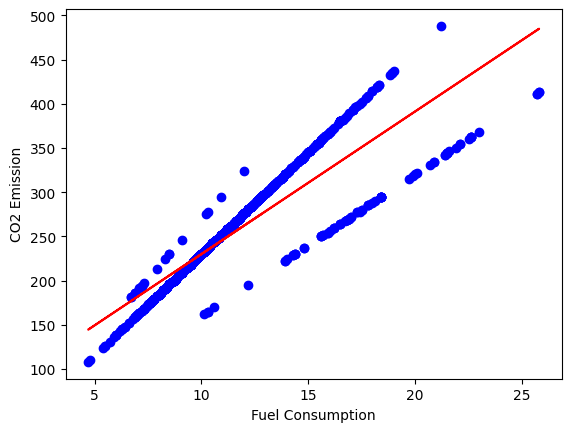

In [42]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color="blue")
plt.plot(fuelTrainX, fuelRegr.coef_[0][0] * fuelTrainX + fuelRegr.intercept_[0], "-r")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show()